In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [125]:
path = 'Combinacao_Resultados.xlsx'
df = pd.read_csv('Combinacao_Resultados_Normalizado.csv')
df_jacobi_keff = pd.read_excel(path, sheet_name='Jacobi_Keff')
df_gauss_keff = pd.read_excel(path, sheet_name='Gauss_Keff')

In [126]:
colors = {
    'Jacobi_Fluxo_Grupo1': '#0072B2',
    'Jacobi_Fluxo_Grupo2': '#009E73',
    'Gauss_Fluxo_Grupo1': '#D95F02',
    'Gauss_Fluxo_Grupo2': '#1cd8ec',
    'Analitico_Fluxo_Grupo1': '#7b2d2d',
    'Analitico_Fluxo_Grupo2': '#2d5b7b'
}
markers = {
    'Jacobi_Fluxo_Grupo1': 's',
    'Jacobi_Fluxo_Grupo2': 's',
    'Gauss_Fluxo_Grupo1': '^',
    'Gauss_Fluxo_Grupo2': '^',
    'Analitico_Fluxo_Grupo1': 'o',
    'Analitico_Fluxo_Grupo2': 'o'
}
lines = {
    'Jacobi_Fluxo_Grupo1': '-',
    'Jacobi_Fluxo_Grupo2': '-',
    'Gauss_Fluxo_Grupo1': '--',
    'Gauss_Fluxo_Grupo2': '--',
    'Analitico_Fluxo_Grupo1': '-',
    'Analitico_Fluxo_Grupo2': '-'
}
labels = {
    'Jacobi_Fluxo_Grupo1': 'Fluxo Normalizado (g=1) - Jacobi',
    'Jacobi_Fluxo_Grupo2': 'Fluxo Normalizado (g=2) - Jacobi',
    'Gauss_Fluxo_Grupo1': 'Fluxo Normalizado (g=1) - Gauss',
    'Gauss_Fluxo_Grupo2': 'Fluxo Normalizado (g=2) - Gauss',
    'Analitico_Fluxo_Grupo1': 'Fluxo Analítico (g=1)',
    'Analitico_Fluxo_Grupo2': 'Fluxo Analítico (g=2)'
}
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'Times New Roman',
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

plt.rc('font', family='serif', serif='Times New Roman')
plt.rc('axes', titlesize=12, labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [127]:
def ax_plot(df, x, col):
    ax.plot(df[x], df[col], label = labels[col], linewidth=1.2,
            markersize=4, color=colors[col],  linestyle=lines[col],
            marker=markers[col])

In [128]:
cols_a1 = ['Posicao', 'Analitico_Fluxo_Grupo1']
cols_a2 = ['Posicao', 'Analitico_Fluxo_Grupo2']
cols_j1 = ['Posicao', 'Jacobi_Fluxo_Grupo1']
cols_j2 = ['Posicao', 'Jacobi_Fluxo_Grupo2']
cols_g1 = ['Posicao', 'Gauss_Fluxo_Grupo1']
cols_g2 = ['Posicao', 'Gauss_Fluxo_Grupo2']
n = 25
df_a1 = pd.concat([df[cols_a1].iloc[[0]], df[cols_a1][::n], df[cols_a1].iloc[[-1]]])
df_a2 = pd.concat([df[cols_a2].iloc[[0]], df[cols_a2][::n], df[cols_a2].iloc[[-1]]])
df_j1 = pd.concat([df[cols_j1].iloc[[0]], df[cols_j1][12::n], df[cols_j1].iloc[[-1]]])
df_j2 = pd.concat([df[cols_j2].iloc[[0]], df[cols_j2][12::n], df[cols_j2].iloc[[-1]]]) 
df_g1 = pd.concat([df[cols_g1].iloc[[0]], df[cols_g1][12::n], df[cols_g1].iloc[[-1]]])
df_g2 = pd.concat([df[cols_g2].iloc[[0]], df[cols_g2][12::n], df[cols_g2].iloc[[-1]]]) 

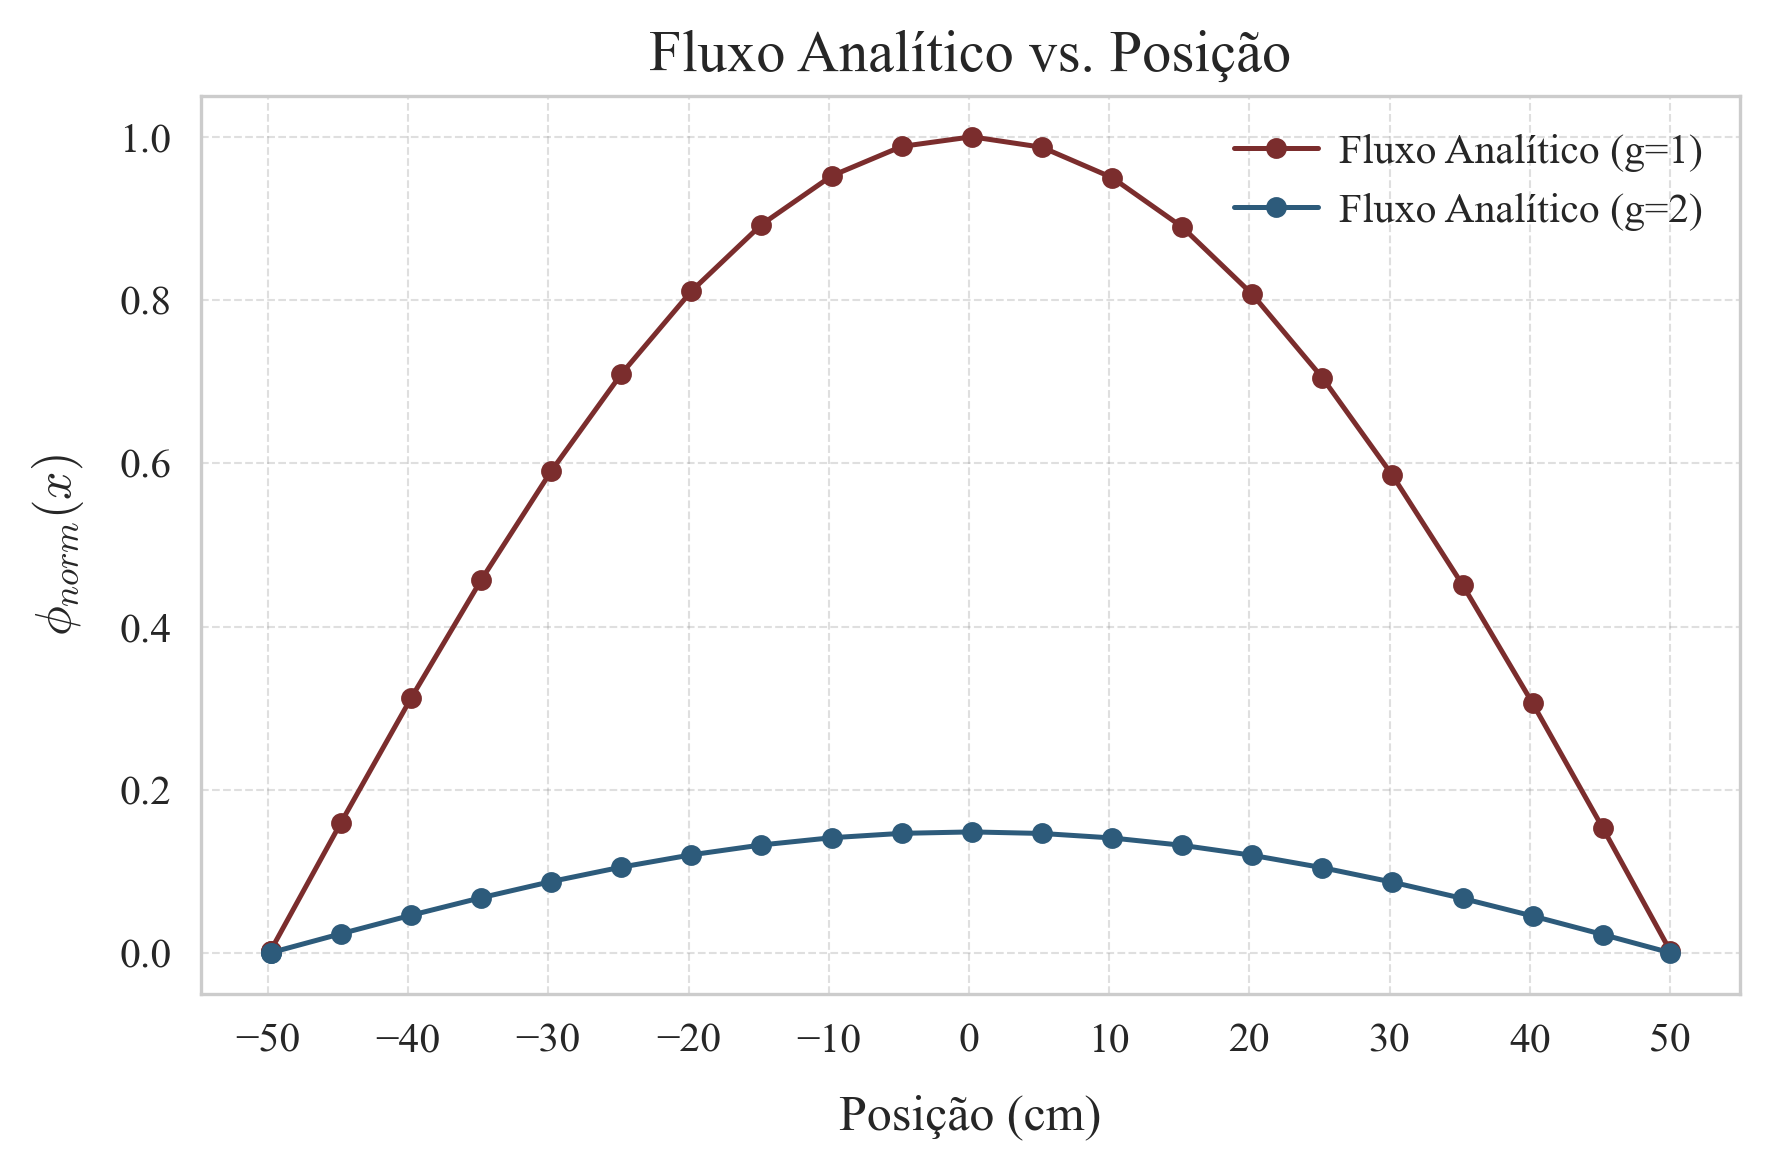

<Figure size 640x480 with 0 Axes>

In [129]:
nome_arquivo = 'fig_analitico_g1_g2'
x = 'Posicao'
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax_plot(df_a1, x, 'Analitico_Fluxo_Grupo1')
ax_plot(df_a2, x, 'Analitico_Fluxo_Grupo2')

ax.set_xlabel('Posição (cm)', labelpad=8)
ax.set_ylabel(r'$\phi_{norm}(x)$', labelpad=8)
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.25)

legend = ax.legend(
    title_fontsize=10,    # fonte do título da legenda
    fontsize=10,          # fonte dos itens
    frameon=False,        # sem borda
    loc='best',           # posição automática
    labelspacing=0.5,     # espaçamento entre linhas
    handlelength=2,       # comprimento da linha no ícone
    handletextpad=0.5     # distância texto-ícone
)

# Adicionando título e rótulos
plt.title(r'Fluxo Analítico vs. Posição', fontsize=14)

plt.xticks(range(-50, 51, 10))
plt.tight_layout()
plt.savefig(f'figures/{nome_arquivo}.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Salva como SVG
plt.savefig(f'figures/{nome_arquivo}.svg', format='svg', bbox_inches='tight')
plt.show()

In [130]:
df_malhas_principais = df.loc[df['Malha'].isin([125, 250, 375])]
cols_malha = ['Malha', 'Posicao', 'Analitico_Fluxo_Grupo1', 'Analitico_Fluxo_Grupo2']
df_malhas_principais[cols_malha]


,Malha,Posicao,Analitico_Fluxo_Grupo1,Analitico_Fluxo_Grupo2
124,125,-25.0,0.704882,0.104635
249,250,0.0,0.999995,0.148443
374,375,25.0,0.709325,0.105295


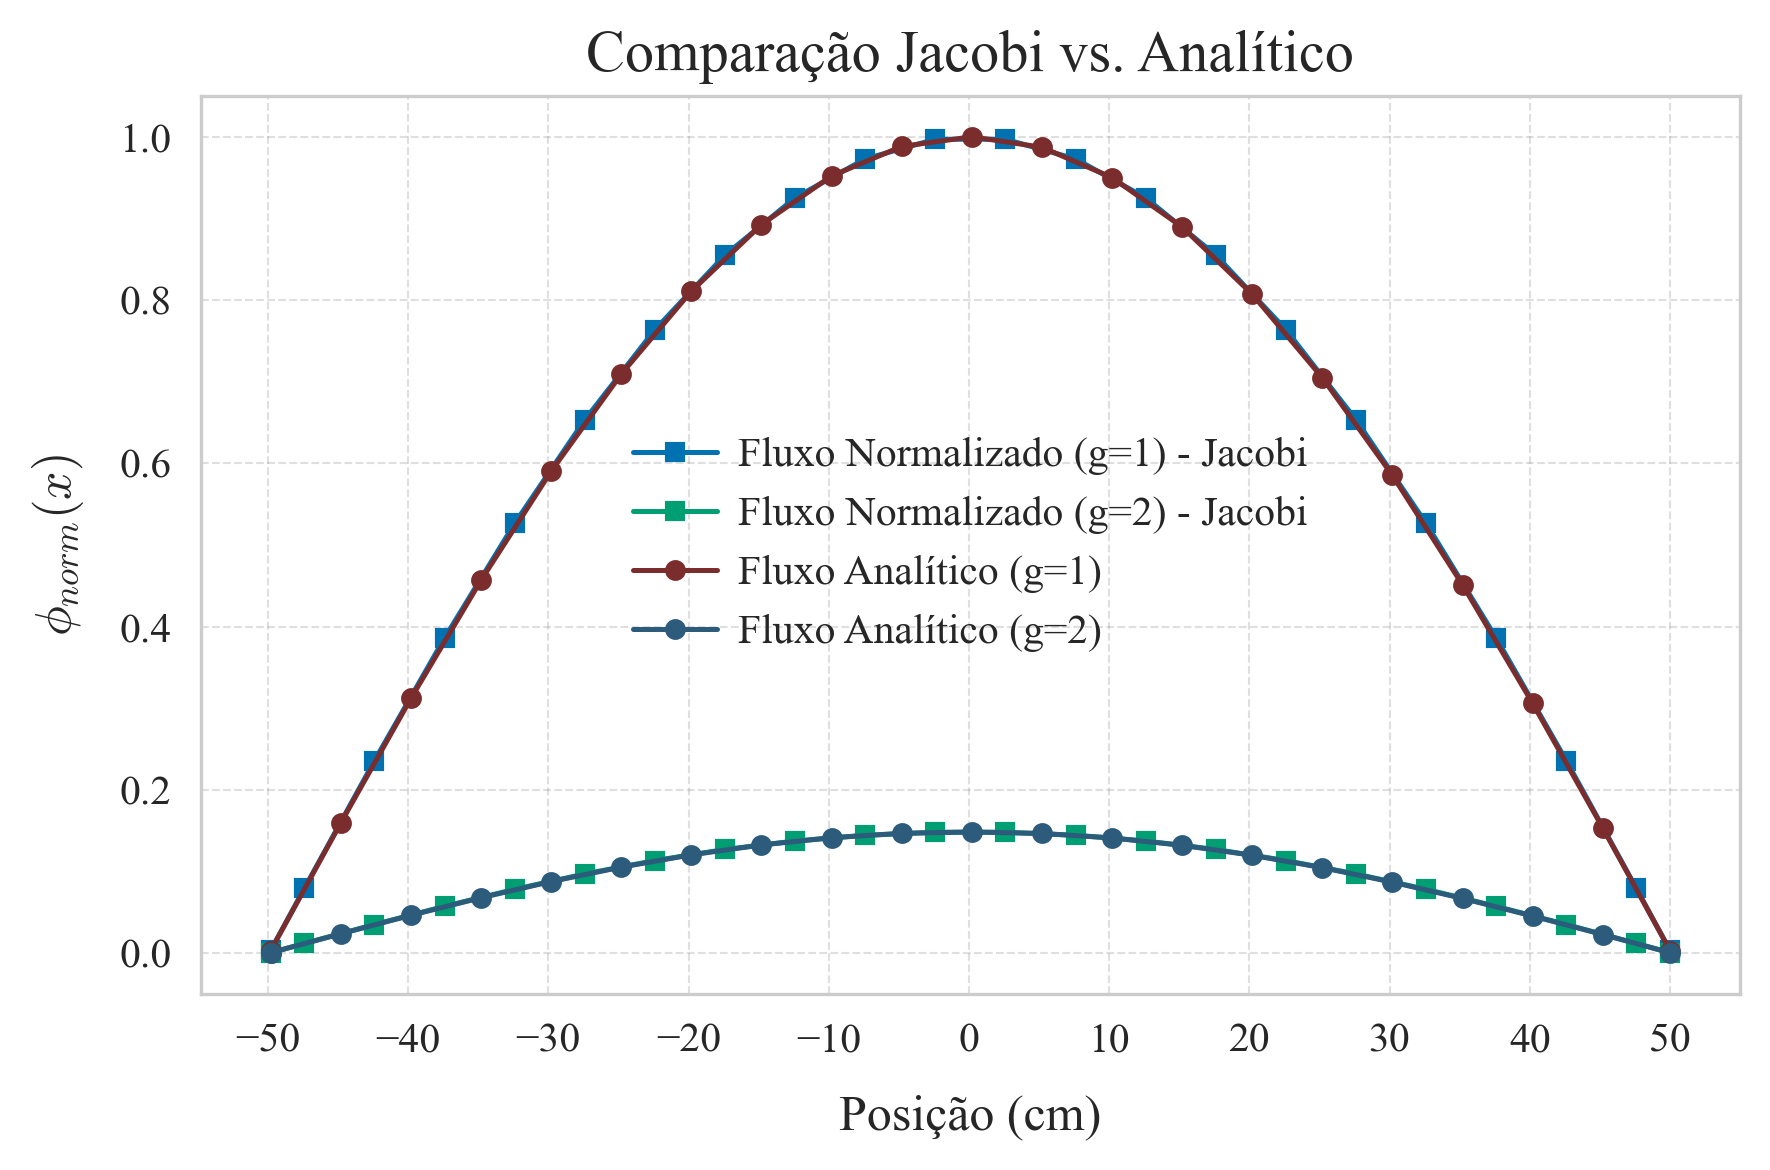

<Figure size 640x480 with 0 Axes>

In [131]:
nome_arquivo = 'fig_jacobi_analitico_g1_g2'
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax_plot(df_j1, x, 'Jacobi_Fluxo_Grupo1')
ax_plot(df_j2, x, 'Jacobi_Fluxo_Grupo2')
ax_plot(df_a1, x, 'Analitico_Fluxo_Grupo1')
ax_plot(df_a2, x, 'Analitico_Fluxo_Grupo2')

ax.set_xlabel('Posição (cm)', labelpad=8)
ax.set_ylabel(r'$\phi_{norm}(x)$', labelpad=8)
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.25)

legend = ax.legend(
    title_fontsize=10,    # fonte do título da legenda
    fontsize=10,          # fonte dos itens
    frameon=False,        # sem borda
    loc='best',           # posição automática
    labelspacing=0.5,     # espaçamento entre linhas
    handlelength=2,       # comprimento da linha no ícone
    handletextpad=0.5     # distância texto-ícone
)

# Adicionando título e rótulos
plt.title(r'Comparação Jacobi vs. Analítico', fontsize=14)

plt.xticks(range(-50, 51, 10))
plt.tight_layout()
plt.savefig(f'figures/{nome_arquivo}.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Salva como SVG
plt.savefig(f'figures/{nome_arquivo}.svg', format='svg', bbox_inches='tight')
plt.show()

In [132]:
cols_malha = ['Malha', 'Posicao', 'Analitico_Fluxo_Grupo1', 'Analitico_Fluxo_Grupo2', 'Jacobi_Fluxo_Grupo1',  'Jacobi_Fluxo_Grupo2',
            'Gauss_Fluxo_Grupo1',            'Gauss_Fluxo_Grupo2'  ]
df_malhas_principais[cols_malha]

,Malha,Posicao,Analitico_Fluxo_Grupo1,Analitico_Fluxo_Grupo2,Jacobi_Fluxo_Grupo1,Jacobi_Fluxo_Grupo2,Gauss_Fluxo_Grupo1,Gauss_Fluxo_Grupo2
124,125,-25.0,0.704882,0.104635,0.708487,0.105166,0.706566,0.104883
249,250,0.0,0.999995,0.148443,1.000000,0.148438,0.999998,0.148441
374,375,25.0,0.709325,0.105295,0.712907,0.105823,0.711203,0.105572


In [133]:
grupo1 = df_malhas_principais.filter(regex=r'_Grupo1$') 
grupo2 = df_malhas_principais.filter(regex=r'_Grupo2$') 


chaves   = df_malhas_principais[['Malha', 'Posicao']]
g1_final = pd.concat([chaves, grupo1], axis=1)
g2_final = pd.concat([chaves, grupo2], axis=1)


g1_final


,Malha,Posicao,Jacobi_Fluxo_Grupo1,Gauss_Fluxo_Grupo1,Analitico_Fluxo_Grupo1
124,125,-25.0,0.708487,0.706566,0.704882
249,250,0.0,1.000000,0.999998,0.999995
374,375,25.0,0.712907,0.711203,0.709325


In [134]:
g2_final

,Malha,Posicao,Jacobi_Fluxo_Grupo2,Gauss_Fluxo_Grupo2,Analitico_Fluxo_Grupo2
124,125,-25.0,0.105166,0.104883,0.104635
249,250,0.0,0.148438,0.148441,0.148443
374,375,25.0,0.105823,0.105572,0.105295


In [135]:
cols_malha = ['Malha', 'Posicao', 'Analitico_Fluxo_Grupo1', 'Analitico_Fluxo_Grupo2', 'Jacobi_Fluxo_Grupo1',  'Jacobi_Fluxo_Grupo2',
            'Gauss_Fluxo_Grupo1',            'Gauss_Fluxo_Grupo2'  ]
df_malhas_principais[cols_malha]

,Malha,Posicao,Analitico_Fluxo_Grupo1,Analitico_Fluxo_Grupo2,Jacobi_Fluxo_Grupo1,Jacobi_Fluxo_Grupo2,Gauss_Fluxo_Grupo1,Gauss_Fluxo_Grupo2
124,125,-25.0,0.704882,0.104635,0.708487,0.105166,0.706566,0.104883
249,250,0.0,0.999995,0.148443,1.000000,0.148438,0.999998,0.148441
374,375,25.0,0.709325,0.105295,0.712907,0.105823,0.711203,0.105572


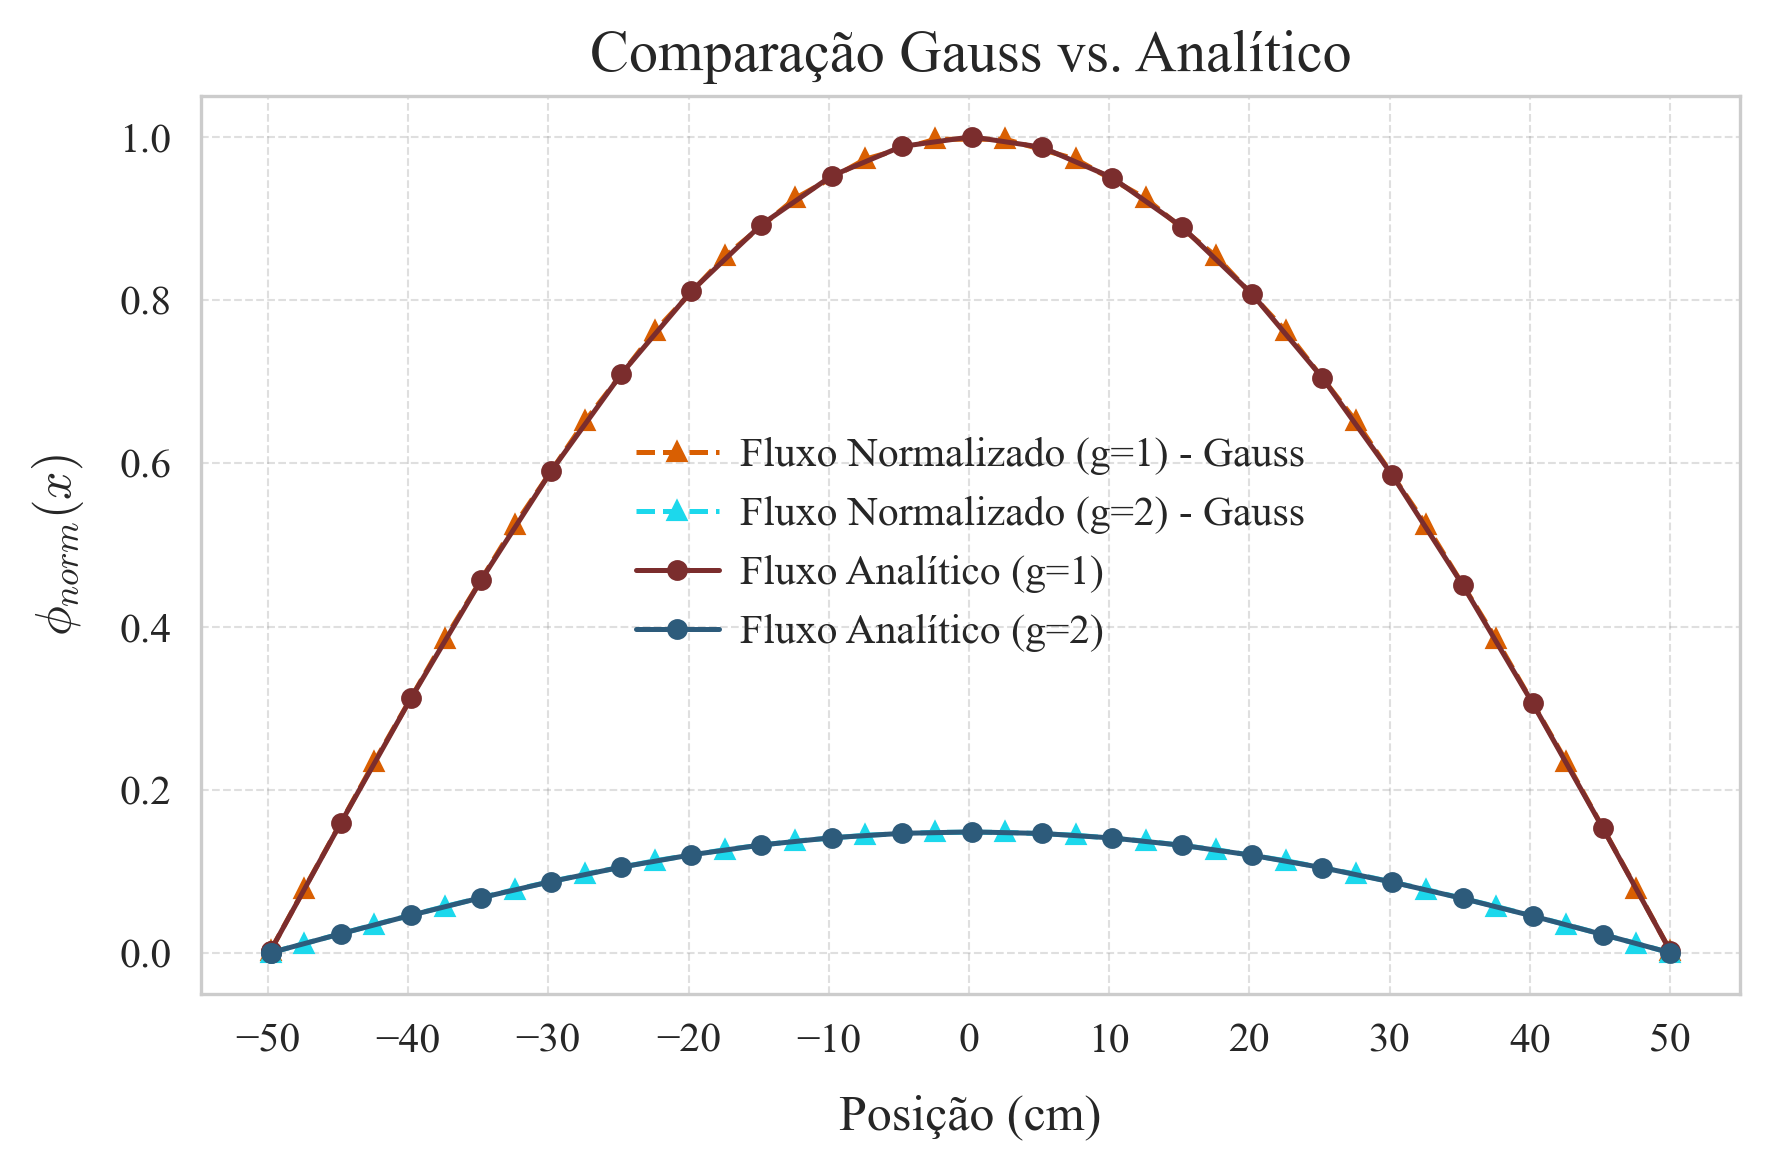

<Figure size 640x480 with 0 Axes>

In [136]:
nome_arquivo = 'fig_gauss_analitico_g1_g2'
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

ax_plot(df_g1, x, 'Gauss_Fluxo_Grupo1')
ax_plot(df_g2, x, 'Gauss_Fluxo_Grupo2')
ax_plot(df_a1, x, 'Analitico_Fluxo_Grupo1')
ax_plot(df_a2, x, 'Analitico_Fluxo_Grupo2')

ax.set_xlabel('Posição (cm)', labelpad=8)
ax.set_ylabel(r'$\phi_{norm}(x)$', labelpad=8)
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.25)

legend = ax.legend(
    title_fontsize=10,    # fonte do título da legenda
    fontsize=10,          # fonte dos itens
    frameon=False,        # sem borda
    loc='best',           # posição automática
    labelspacing=0.5,     # espaçamento entre linhas
    handlelength=2,       # comprimento da linha no ícone
    handletextpad=0.5     # distância texto-ícone
)

# Adicionando título e rótulos
plt.title(r'Comparação Gauss vs. Analítico', fontsize=14)

plt.xticks(range(-50, 51, 10))
plt.tight_layout()
plt.savefig(f'figures/{nome_arquivo}.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Salva como SVG
plt.savefig(f'figures/{nome_arquivo}.svg', format='svg', bbox_inches='tight')
plt.show()

In [137]:
cols_malha = ['Malha', 'Posicao', 'Analitico_Fluxo_Grupo1', 'Analitico_Fluxo_Grupo2']
df_malhas_principais[cols_malha]

,Malha,Posicao,Analitico_Fluxo_Grupo1,Analitico_Fluxo_Grupo2
124,125,-25.0,0.704882,0.104635
249,250,0.0,0.999995,0.148443
374,375,25.0,0.709325,0.105295


In [138]:
def summarize_errors(df, methods=('Jacobi','Gauss'), groups=(1,2), attach_errors=False):
    records = []
    for m in methods:
        for g in groups:
            num = df[f"{m}_Fluxo_Grupo{g}"]
            ana = df[f"Analitico_Fluxo_Grupo{g}"]
            err = num - ana
            abs_err = err.abs()
            rel_err = abs_err / ana
            pct_err = rel_err * 100

            if attach_errors:
                df[f"err_abs_{m}_G{g}"] = abs_err
                df[f"err_rel_{m}_G{g}"] = rel_err
                df[f"err_pct_{m}_G{g}"] = pct_err

            records.append({
                'Método': m,
                'Grupo':   g,
                'MAE':     abs_err.mean(),
                'MRE':     rel_err.mean(),
                'MPe (%)': pct_err.mean(),
                'RMSE':    np.sqrt((abs_err**2).mean()),
                'Norma Máx.': abs_err.max()
            })

    summary = pd.DataFrame.from_records(records,
                                        columns=['Método','Grupo','MAE','MRE','MPe (%)','RMSE','Norma Máx.'])
    return summary

In [139]:
erro_sum = summarize_errors(df, attach_errors=True)
erro_sum[['Método', 'Grupo', 'RMSE', 'MPe (%)', 'Norma Máx.']]

,Método,Grupo,RMSE,MPe (%),Norma Máx.
0,Jacobi,1,0.002541,0.508306,0.003912
1,Jacobi,2,0.000374,0.504666,0.000577
2,Gauss,1,0.001262,0.251924,0.002028
3,Gauss,2,0.000186,0.250148,0.000299


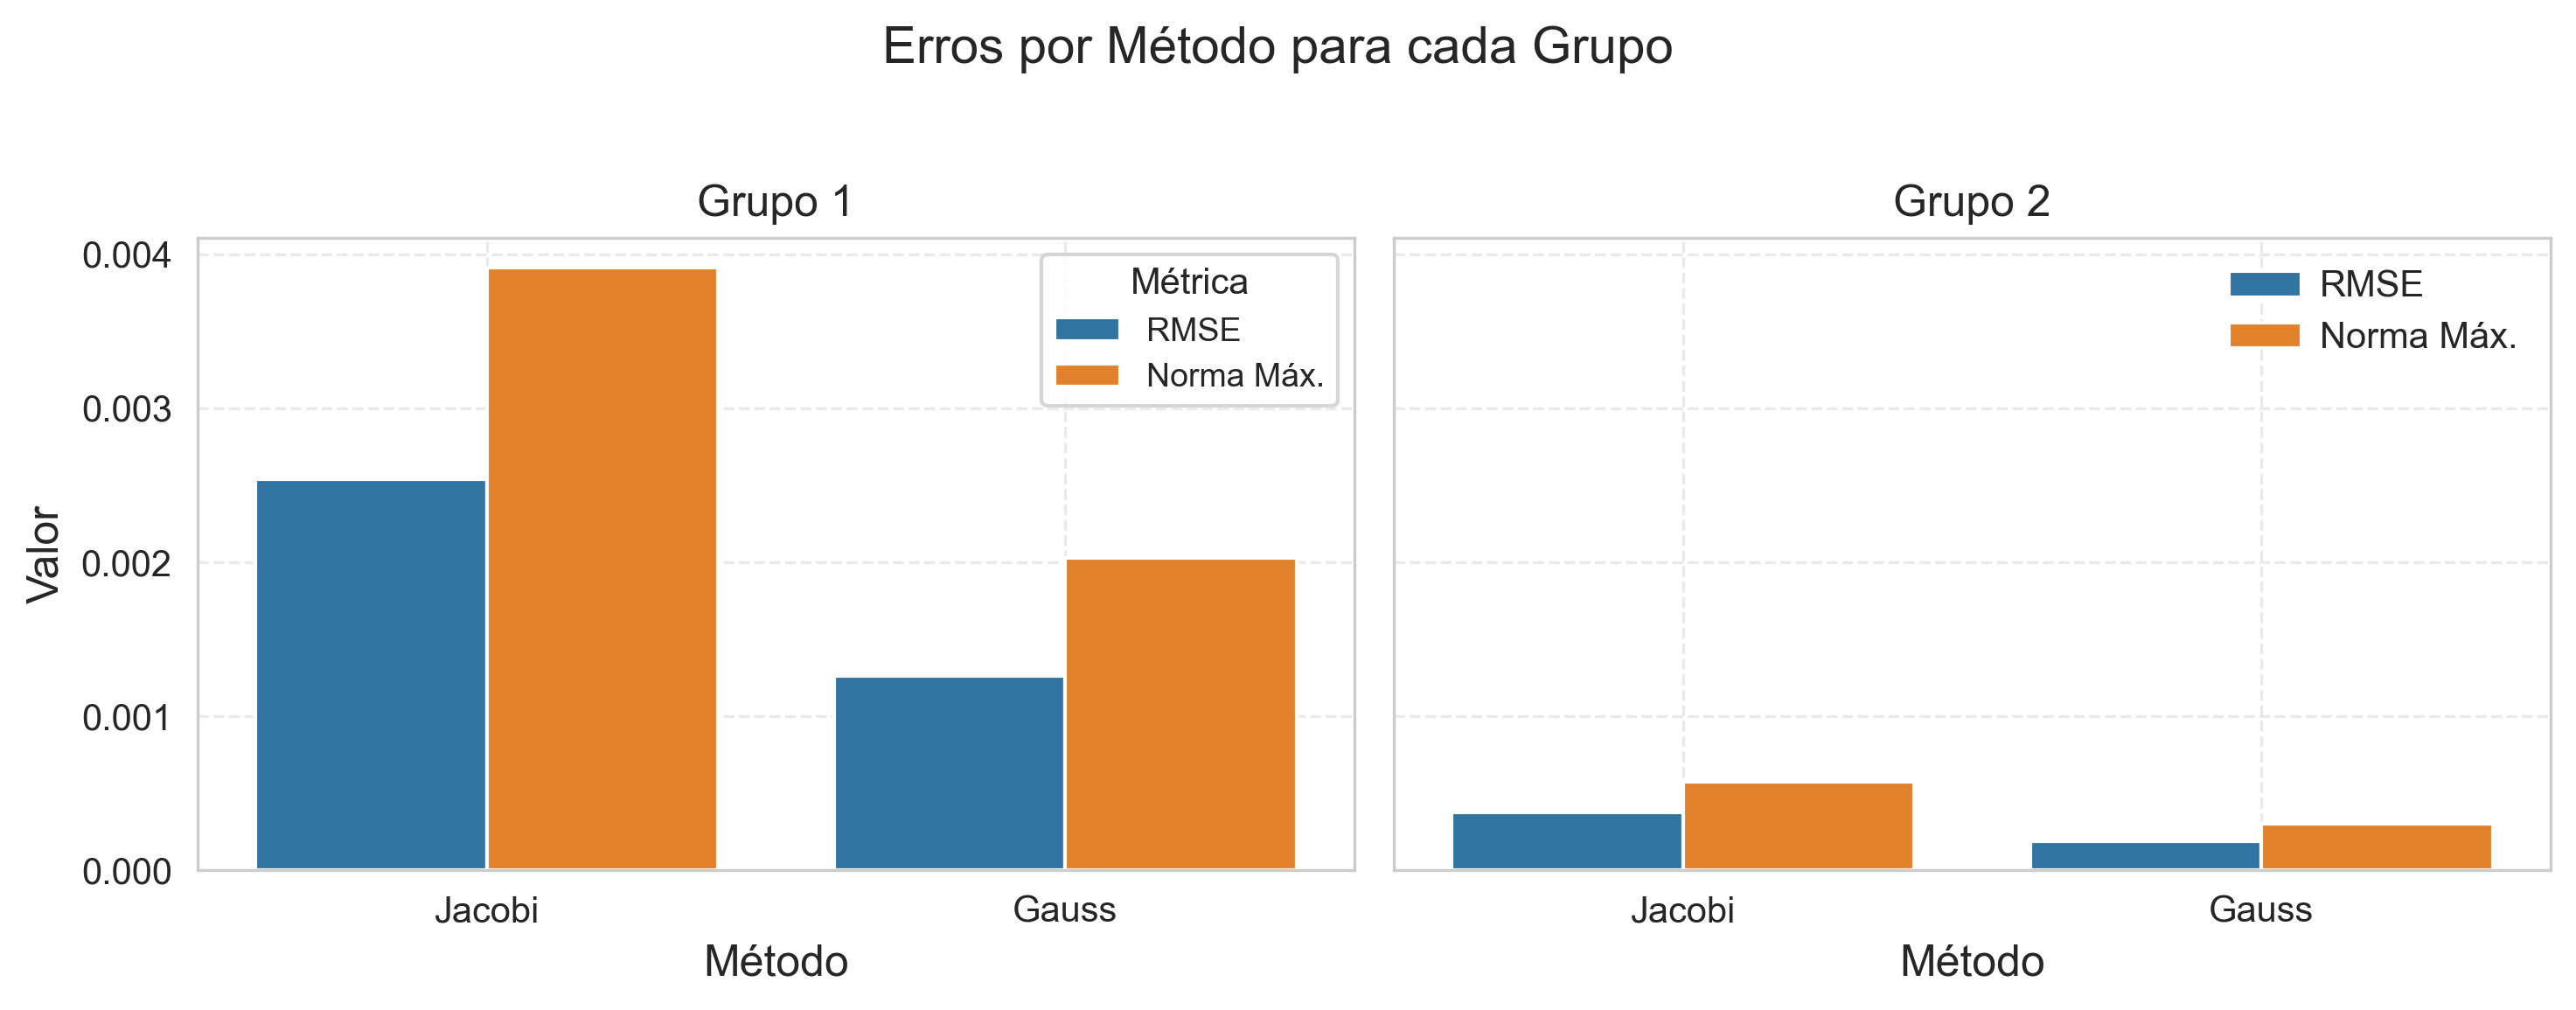

In [140]:
sns.set_style("whitegrid")


fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2, figsize=(10, 4), dpi=300, sharey=True
)

for ax, g in zip((ax1, ax2), [1, 2]):
    subset = df_plot[df_plot["Grupo"] == g]

    sns.barplot(
        data=subset,
        x="Método", y="Valor",
        hue="Métrica",  
        dodge=True, errorbar=None,
        ax=ax
    )
    ax.set_title(f"Grupo {g}")
    ax.set_xlabel("Método")
    if g == 1:
        ax.set_ylabel("Valor")
    else:
        ax.set_ylabel("")
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(title="Métrica")
legend = ax.legend(
    title_fontsize=10,    
    fontsize=10,         
    frameon=False,        
    loc='best',          
    labelspacing=0.5,    
    handlelength=2,    
    handletextpad=0.5    
)


fig.suptitle("Erros por Método para cada Grupo", fontsize=14)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

for ext in ("pdf", "svg"):
    fig.savefig(f"figures/barplot_grupos.{ext}",
                format=ext, bbox_inches="tight")

plt.show()

C:\Users\fr57a\AppData\Local\Temp\ipykernel_13672\691875844.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


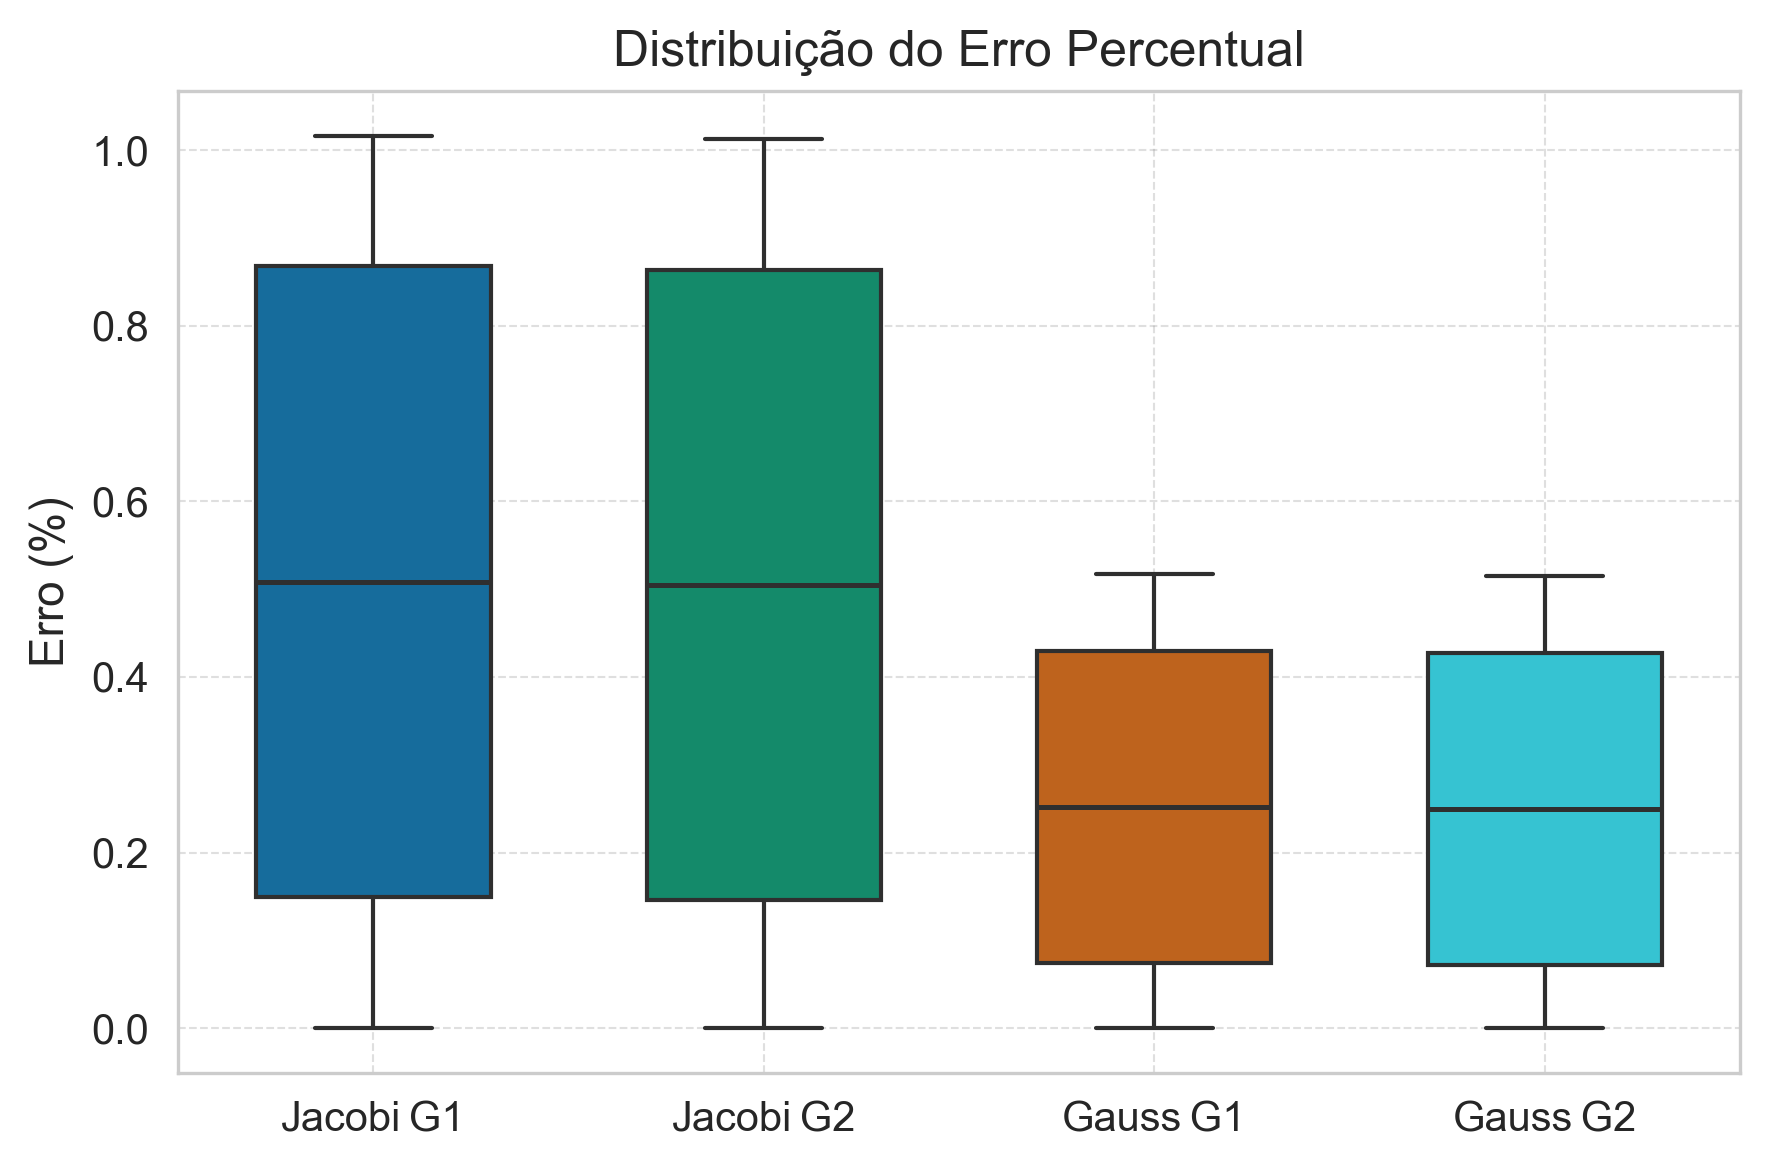

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# ── CONFIGURAÇÃO ABNT ───────────────────────────────────────────────
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif":  ["Times New Roman", "Times", "CMU Serif", "DejaVu Serif"],
    "mathtext.fontset": "cm",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 9,
    "axes.linewidth": 0.8,
})
sns.set_style("whitegrid")

# ── DICIONÁRIO DE CORES (exemplo) ──────────────────────────────────
colors_box = {
    "Jacobi G1": colors['Jacobi_Fluxo_Grupo1'],
    "Jacobi G2": colors['Jacobi_Fluxo_Grupo2'],
    "Gauss G1":  colors['Gauss_Fluxo_Grupo1'],
    "Gauss G2":  colors['Gauss_Fluxo_Grupo2']
}

# ── SELECIONA E DERRETE OS DADOS ───────────────────────────────────
cols = ["err_pct_Jacobi_G1", "err_pct_Jacobi_G2",
        "err_pct_Gauss_G1",  "err_pct_Gauss_G2"]

df_box = (
    df[cols]                # pega só as colunas desejadas
      .rename(columns={
          "err_pct_Jacobi_G1": "Jacobi G1",
          "err_pct_Jacobi_G2": "Jacobi G2",
          "err_pct_Gauss_G1":  "Gauss G1",
          "err_pct_Gauss_G2":  "Gauss G2"
      })
      .melt(var_name="Série", value_name="Erro %")
)

# ── BOXPLOT ---------------------------------------------------------
plt.figure(figsize=(6, 4), dpi=300)

sns.boxplot(
    data=df_box,
    x="Série", y="Erro %",
    palette=colors_box,          # usa as cores do dicionário
    width=0.6,
    showcaps=True,
    boxprops={"linewidth": 1},
    whiskerprops={"linewidth": 1},
    medianprops={"linewidth": 1.2}
)

# Rótulos e grade
plt.xlabel("")
plt.ylabel("Erro (%)")
plt.title("Distribuição do Erro Percentual", pad=6)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray", alpha=0.25)

plt.tight_layout()

# Salva vetorial
for ext in ("pdf", "svg"):
    plt.savefig(f"figures/boxplot_erro_pct.{ext}",
                format=ext, bbox_inches="tight")

plt.show()
